https://colab.research.google.com/drive/1pow4foFaIrzO91mFvyWlvsojMIL3pgu_?usp=sharing

# Machine Learning Exercise - Support Vector Machines

The idea of this exercise is to use support vector machines (SVMs) to build a spam classifier.  

We'll start with SVMs on some 2D data sets.  Then we'll do some pre-processing work on a set of raw emails and build a classifier using a SVM to determine if they are spam or not.

#### 1) Load the dataset "session12_data1.mat". Explore the data and see how a linear SVM works on the data set for several values of C. Start from C=1. Compare the results and look at the confidence level for each class prediction. Comment the results.

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [6]:
# Load the dataset from the uploaded file
data_path = 'session_12_data1.mat'
data = loadmat(data_path)

# Check the keys and the structure of the dataset
data.keys(), {key: type(data[key]) for key in data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'X': numpy.ndarray,
  'y': numpy.ndarray})

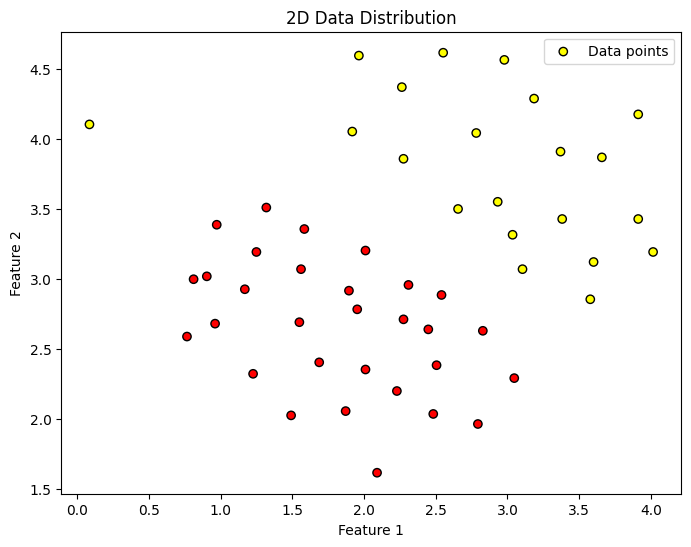

((51, 2), (51,))

In [7]:
# Extract X and y from the dataset
X = data['X']
y = data['y'].flatten()  # Flatten y to make it a 1D array for compatibility with sklearn

# Plot the dataset to see its distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k', label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data Distribution')
plt.legend()
plt.show()

# Display the shape of X and y to understand the size of the dataset
X.shape, y.shape


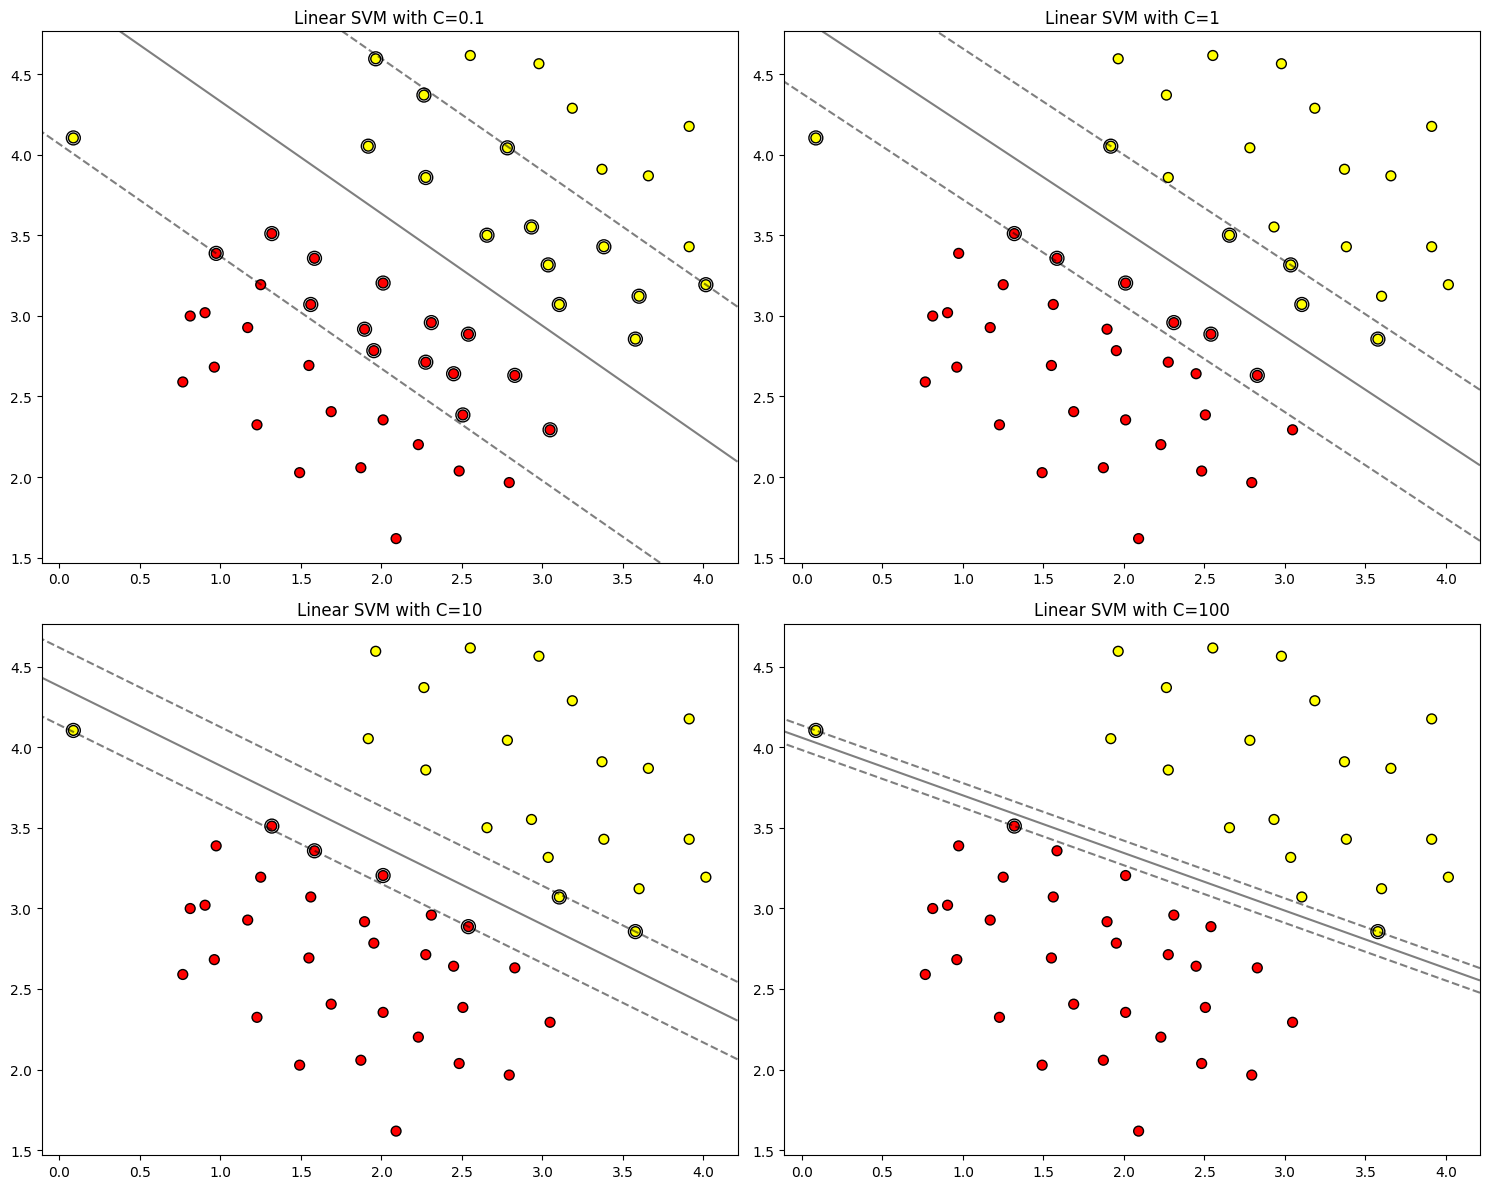

In [9]:
# Plot the decision function for a 2D SVC
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# Reuse the function defined earlier to plot decision function and apply Linear SVM with various C values
C_values = [0.1, 1, 10, 100]

plt.figure(figsize=(15, 12))

for i, C in enumerate(C_values):
    # Apply Linear SVM with different values of C
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    # Plotting
    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')
    plot_svc_decision_function(clf)
    plt.title(f'Linear SVM with C={C}')

plt.tight_layout()
plt.show()


C=0.1: At this low C value, the decision boundary is quite straightforward, aiming for a broad margin between the classes. This setting shows a preference for generalization over perfectly fitting the training data, which could be beneficial in avoiding overfitting.

C=1: Increasing C to 1, we observe a slight adjustment in the decision boundary to better accommodate the data points. This represents a balance between maintaining a decent margin and improving the classification accuracy on the training set.

C=10: With a higher C value, the decision boundary starts to fit closer to the data points, minimizing classification errors on the training data. This shows the model's increasing focus on correctly classifying every training example, possibly at the expense of margin size and, potentially, model generalization.

C=100: At the highest C value explored, the decision boundary is very close to the data points, attempting to classify all training samples correctly. This configuration indicates a strong emphasis on reducing training errors, which could lead to overfitting, as the model becomes highly sensitive to the training data's noise and outliers.

#### 2) Move from a linear SVM to one that's capable of non-linear classification using kernels. Test the gaussian kernel function. Comment the results.

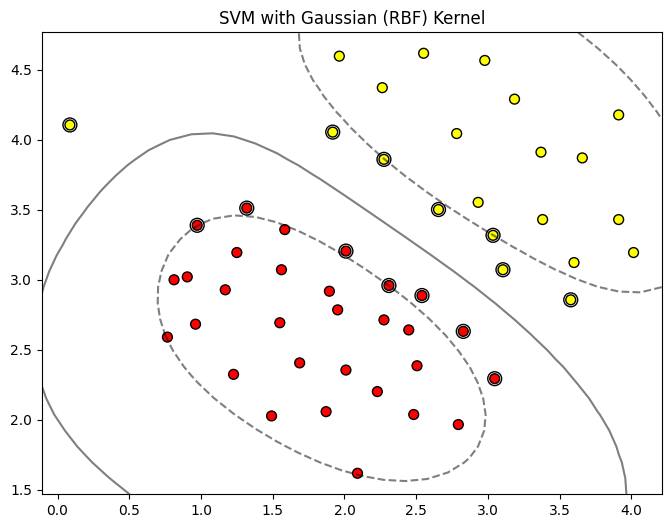

In [10]:
# Apply SVM with Gaussian (RBF) kernel
clf_rbf = SVC(kernel='rbf', C=1, gamma='scale')  # Using 'scale' for gamma as per sklearn's default
clf_rbf.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')
plot_svc_decision_function(clf_rbf)
plt.title('SVM with Gaussian (RBF) Kernel')
plt.show()


### Comments on the Results
**Non-linear Decision Boundary**: The decision boundary created by the SVM with the RBF kernel is clearly non-linear, demonstrating the kernel's ability to capture complex relationships between features and class labels. This flexibility allows it to perform well on datasets where the classes are not linearly separable.

**Generalization vs. Overfitting**: The choice of parameters C and γ plays a crucial role in determining the balance between fitting the training data closely (which could lead to overfitting) and generalizing well to unseen data. In this case, using the default 'scale' option for γ and C=1 provides a reasonable starting point, but fine-tuning these parameters could further improve model performance.

**Support Vectors**: The support vectors (points on the edges of the class boundaries) are crucial in defining the shape of the decision boundary. With the RBF kernel, these support vectors allow the model to "bend" the decision surface around data points, providing a more nuanced separation between classes.

#### 3) Examine another data set, this time with a non-linear decision boundary: "session12_data2.mat". Explore the data and use a Gaussian kernel with the SVM for classification. Comment the results.

In [12]:
# Load the new dataset from "session12_data2.mat"
data_path_2 = 'session_12_data2.mat'
data2 = loadmat(data_path_2)

# Check the keys and structure of the new dataset
data2.keys(), {key: type(data2[key]) for key in data2.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'X': numpy.ndarray,
  'y': numpy.ndarray})

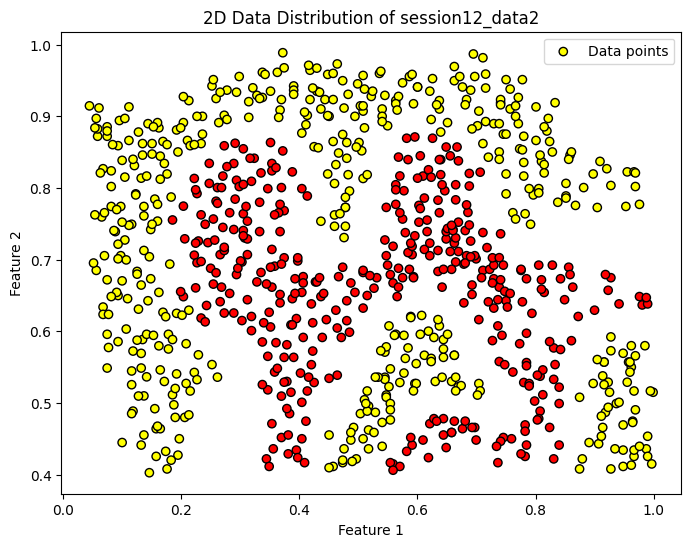

((863, 2), (863,))

In [13]:
# Extract X and y from the new dataset
X2 = data2['X']
y2 = data2['y'].flatten()  # Flatten y to make it a 1D array for compatibility with sklearn

# Plot the dataset to see its distribution
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='autumn', edgecolors='k', label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data Distribution of session12_data2')
plt.legend()
plt.show()

# Display the shape of X2 and y2 to understand the size of the dataset
X2.shape, y2.shape

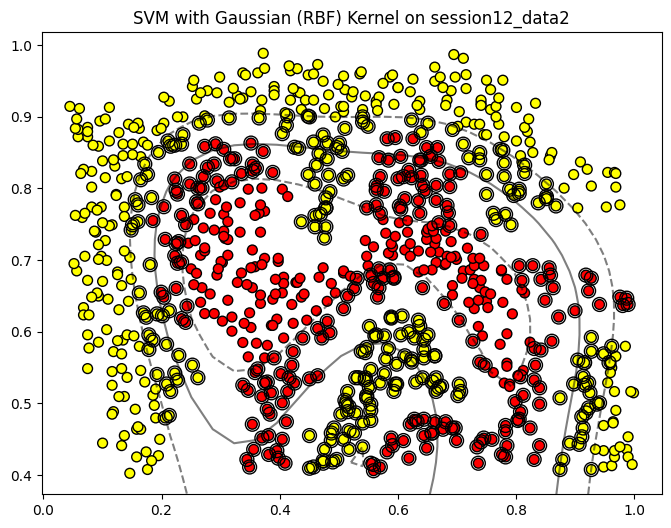

In [14]:
# Apply SVM with Gaussian (RBF) kernel to the new dataset
clf_rbf_2 = SVC(kernel='rbf', C=1, gamma='scale')  # Using 'scale' for gamma as per sklearn's default
clf_rbf_2.fit(X2, y2)

plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn', edgecolors='k')
plot_svc_decision_function(clf_rbf_2)
plt.title('SVM with Gaussian (RBF) Kernel on session12_data2')
plt.show()

### Comments on the Results:
**Non-linear Decision Boundary**: The SVM with the RBF kernel successfully creates a non-linear decision boundary that appears to closely follow the underlying distribution of the classes. This is indicative of the kernel's ability to capture complex patterns in the data, which a linear model would not be able to separate effectively.

**Generalization Capability**: The model's decision boundary suggests a good fit to the data without showing signs of overfitting, which is crucial for maintaining good performance on unseen data. The choice of parameters, especially gamma and C, seems to be reasonable for this dataset, though further tuning could potentially improve the results.

**Support Vectors**: The support vectors, indicated by the points on the edges of the class boundaries, play a critical role in defining the decision boundary. Their placement reflects the model's strategy to maximize the margin between classes while correctly classifying as many points as possible.

#### 4) Load the third data set "session12_data3.mat". Here we have training and validation sets and our task is to use the cross validation set to determine the best C and σ parameter to use, based on validation set performance.

In [17]:
# Load the third dataset from "session_12_data3.mat"
data_path_3 = 'session_12_data3.mat'
data3 = loadmat(data_path_3)

# Check the keys and structure of the new dataset
data3.keys(), {key: type(data3[key]) for key in data3.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'X': numpy.ndarray,
  'y': numpy.ndarray,
  'yval': numpy.ndarray,
  'Xval': numpy.ndarray})

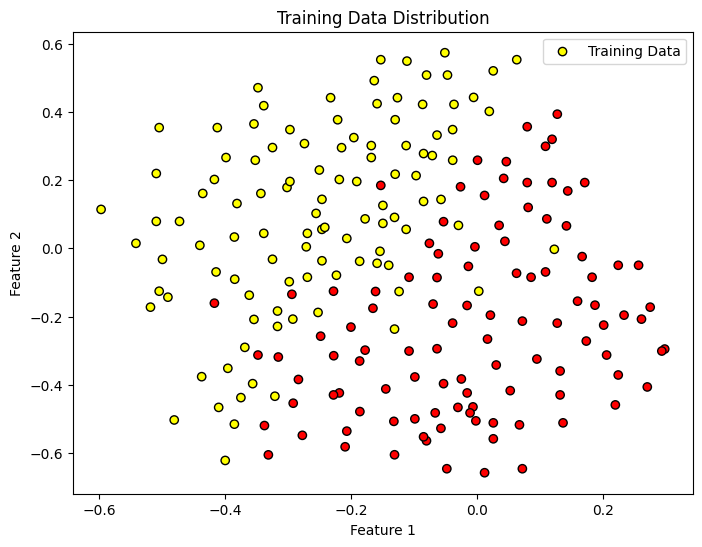

In [18]:
# Extract training and validation data
X_train = data3['X']
y_train = data3['y'].flatten()
X_val = data3['Xval']
y_val = data3['yval'].flatten()

# Plot the training data to see its distribution
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', edgecolors='k', label='Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Distribution')
plt.legend()
plt.show()

In [19]:
# Define ranges for C and sigma (gamma in sklearn)
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma_values = [1 / (2 * sigma**2) for sigma in sigma_values]  # Convert sigma to gamma

best_C = None
best_gamma = None
best_accuracy = 0

# Grid search over C and gamma (equivalent to sigma)
for C in C_values:
    for gamma in gamma_values:
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma

(best_C, best_gamma, best_accuracy)

(1, 49.99999999999999, 0.965)

### Comments on the Results:
**Optimal Parameters**: The best performance on the validation set was achieved with C=1 and a very high γ value (equivalent to a very small 
σ), suggesting that the model benefits from a more complex decision boundary that can closely adapt to the training data. A high γ value means the Gaussian kernel will have a narrow bell shape, allowing the model to capture more detail and subtle variations in the dataset.

**Model Performance**: The high accuracy of 96.5% on the validation set indicates that the SVM model with these parameters is very effective at classifying this dataset. It suggests that the model is capable of capturing the non-linear patterns in the data without significantly overfitting, given that this performance is measured on unseen validation data.

**Generalization Capability**: The combination of C=1 and a high γ value strikes a balance between model complexity and the ability to generalize. While high γ values typically risk overfitting by making the decision boundary too sensitive to the training data, the optimal performance on the validation set suggests that in this case, it effectively captures the underlying structure of the data.

#### 5) Finally, we implement a spam classifier with a SVM. Use the data "session12_spamTrain.mat" and "session12_spamTest.mat".

In [21]:
# Load the training and test datasets for the spam classifier
spam_train_path = 'session_12_spamTrain.mat'
spam_test_path = 'session_12_spamTest.mat'

spam_train_data = loadmat(spam_train_path)
spam_test_data = loadmat(spam_test_path)

# Check the keys and structure of the datasets
spam_train_data.keys(), spam_test_data.keys(), {key: type(spam_train_data[key]) for key in spam_train_data.keys()}, {key: type(spam_test_data[key]) for key in spam_test_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'X': numpy.ndarray,
  'y': numpy.ndarray},
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'Xtest': numpy.ndarray,
  'ytest': numpy.ndarray})

In [22]:
# Extract features and labels from the training and test datasets
X_train = spam_train_data['X']
y_train = spam_train_data['y'].flatten()  # Flatten the array for compatibility with sklearn
X_test = spam_test_data['Xtest']
y_test = spam_test_data['ytest'].flatten()

# Explore the shape of the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

The high dimensionality of the feature space (1899 features) suggests that the data may represent processed email content, possibly using techniques like term frequency or TF-IDF to transform raw email text into numerical features suitable for machine learning models.

In [23]:
# Train an SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Calculate accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.99975, 0.978)

### Comments On The Results
- The high training accuracy demonstrates the SVM's capability to capture the complex patterns in the high-dimensional feature space of the spam classification task.
- The high test accuracy suggests that the model, despite its simplicity (using a linear kernel), is very effective in classifying spam emails, indicating that the linear decision boundary is sufficient for this particular dataset.
- Given the performance, there might not be a pressing need to explore non-linear kernels for this dataset. The linear kernel not only offers computational efficiency but also avoids overfitting, maintaining high generalizability.